## Project name :**Global Energy Transition Analysis (1990–2024)**

## Project Overview / What We Did:

1. **Data Collection & Loading:** Used country-wise yearly data on Coal, Oil, Gas, Renewable energy, and CO2 emissions. Loaded into Python using pandas.

2. **Data Cleaning & Preparation:** Handled missing values (numeric filled with mean, text with “Unknown”), removed duplicates, and added columns like Fossil Fuel Share and Continent.

3. **Exploratory Data Analysis (EDA):** Calculated statistics, visualized trends using line charts, bar charts, and pie charts, and analyzed top countries and regions in renewable adoption.

4. **Correlation & Impact Analysis:** Studied correlations between energy sources and analyzed the relationship between renewable energy share and CO2 emissions. Identified countries with highest CO2 reduction.

5. **Visualizations & Insights:** Created line charts, scatter plots, heatmaps, stacked bar charts, and pie charts for global and continental energy trends.

6. **Final Insights:** Renewable energy share is rising globally, fossil fuels are declining, and regions with higher renewables show lower CO2 emissions. Asia and Europe show the strongest growth momentum. Provides insights for policymakers, researchers, and energy stakeholders.


STEP 1: Mount Google Drive

We start by connecting Google Drive to Colab so we can access our dataset easily.
It’s like plugging in a hard drive — Colab needs permission to open your Drive.
This makes reading and saving files super simple during analysis.
Once mounted, you can treat your Drive like a local folder.
It’s the first and most basic setup step before working with data.


In [ ]:
# First, we connect our Google Drive to access the Excel file.
# This allows us to read and save data easily during the project.

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


STEP 2: Load the Dataset

After connecting Drive, we load our Excel file using pandas.
This brings our dataset into Python, where we can start exploring it.
We use pd.read_excel() and store it in a variable called data.
Then we preview the first few rows using data.head() to check everything looks fine.
It’s just a quick sanity check to ensure the file loaded correctly.

In [ ]:
# Now, we load the Excel file using pandas.
# We’ll preview the first few rows to get a quick look at the data.

import pandas as pd
path = '/content/drive/MyDrive/DA&R/World_Energy_Transition_1990_2024_with_SNo_and_RecordID.xlsx'
data = pd.read_excel(path)
data.head()


,S.No,Record_ID,Country,Year,Coal (%),Oil (%),Gas (%),Renewable (%),Nuclear (%),Total_Energy_Consumption (TWh),CO2_Emissions (Million Tons),Population (Millions),GDP (Trillion USD),Renewable_Growth_%,Emission_Reduction_%,Renewable_vs_Emission_Ratio
0,1,United States_1990_0001,United States,1990,77.264482,13.294615,9.933978,9.108954,7.996491,7006.260185,699.386094,265.848361,19.089011,0.000000,0.000000,0.013024
1,2,United States_1991_0002,United States,1991,76.273518,13.147329,10.009331,9.648992,8.095742,6076.098910,691.781295,265.894049,19.336739,5.928650,1.087354,0.013948
2,3,United States_1992_0003,United States,1992,75.721510,13.065523,10.309005,10.540505,7.943526,1784.107212,696.935605,266.895324,19.635317,15.715862,0.350377,0.015124
3,4,United States_1993_0004,United States,1993,75.292404,12.707810,10.191084,10.934381,7.929995,9309.632275,682.399660,272.168325,19.349028,20.039911,2.428764,0.016023
4,5,United States_1994_0005,United States,1994,73.046674,12.227574,10.560761,11.244024,8.382964,12616.268605,680.547776,276.840831,20.301167,23.439241,2.693551,0.016522


STEP 3: Check Dataset Info

Now we take a closer look at the dataset’s structure.
Using data.info(), we can see column names, data types, and how many values are missing.
This helps us understand what kind of cleaning might be needed.
It’s like looking at a blueprint before starting any construction work.
From here, we know what data we’re dealing with — text, numbers, or empty cells.

In [ ]:
# Let's check the basic structure of the dataset.
# This gives us information about column names, data types, and missing values.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S.No                            1400 non-null   int64  
 1   Record_ID                       1400 non-null   object 
 2   Country                         1400 non-null   object 
 3   Year                            1400 non-null   int64  
 4   Coal (%)                        1400 non-null   float64
 5   Oil (%)                         1400 non-null   float64
 6   Gas (%)                         1400 non-null   float64
 7   Renewable (%)                   1400 non-null   float64
 8   Nuclear (%)                     1400 non-null   float64
 9   Total_Energy_Consumption (TWh)  1400 non-null   float64
 10  CO2_Emissions (Million Tons)    1400 non-null   float64
 11  Population (Millions)           1400 non-null   float64
 12  GDP (Trillion USD)              14

STEP 4: Statistical Summary

Next, we summarize all the numeric columns using describe().
It gives important details like mean, median, min, and max values.
This helps us catch unusual or extreme data points (outliers).
We also get a quick feel of how values are spread out.
Basically, it’s a snapshot of the dataset’s numerical health.

In [ ]:
# We can use describe() to see the statistical summary of numerical columns.
# This helps understand the data distribution and identify outliers.

data.describe()


,S.No,Year,Coal (%),Oil (%),Gas (%),Renewable (%),Nuclear (%),Total_Energy_Consumption (TWh),CO2_Emissions (Million Tons),Population (Millions),GDP (Trillion USD),Renewable_Growth_%,Emission_Reduction_%,Renewable_vs_Emission_Ratio
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,2007.000000,47.311022,16.980748,16.946013,19.805023,5.725844,7549.686273,376.908449,672.889058,15.926720,155.234705,19.832380,0.084516
std,404.2895,10.103114,15.565623,6.272957,6.045395,7.913698,3.112969,4263.723273,184.518265,359.889470,8.118434,147.203585,17.558659,0.099140
min,1.0000,1990.000000,1.000000,2.362363,5.599600,2.110635,0.000000,227.862296,50.000000,34.311855,0.431185,0.000000,0.000000,0.005363
25%,350.7500,1998.000000,36.669812,11.714674,11.982877,13.845488,3.162868,3915.146565,251.305412,370.604821,9.222718,57.996294,6.231213,0.033431
50%,700.5000,2007.000000,48.022405,16.652461,16.221136,19.240560,5.972218,7461.653885,379.106758,650.482123,15.064676,118.452119,14.341624,0.051317
75%,1050.2500,2016.000000,59.223093,22.393719,22.393845,25.385455,8.383417,11365.508951,499.566255,932.293113,22.230266,202.511606,28.994119,0.090018
max,1400.0000,2024.000000,79.982638,29.994802,30.357882,42.778061,12.646690,14965.383559,788.579741,1456.793085,39.846525,1169.494813,82.942039,0.619236


STEP 5: Check for Missing Values

Before analysis, we check which columns have missing values.
Using isnull().sum(), we count how many gaps each column has.
Missing data can create bias or errors in graphs and calculations.
So this step helps us prepare to clean or fix them later.
It’s like inspecting a car for dents before painting it.

In [ ]:
# Missing values can affect analysis accuracy.
# Here, we check which columns have null or empty values.

data.isnull().sum()


,0
S.No,0
Record_ID,0
Country,0
Year,0
Coal (%),0
Oil (%),0
Gas (%),0
Renewable (%),0
Nuclear (%),0
Total_Energy_Consumption (TWh),0


STEP 6: Fill Missing Numeric Values

For columns with numbers, we fill missing cells with the column’s mean value.
This prevents loss of data while keeping overall patterns the same.
Instead of deleting incomplete rows, we smartly replace them.
It’s one of the most common ways to handle numeric gaps.
After this, all numeric columns become fully usable for analysis.


In [ ]:
# Let’s fill missing numeric values using the mean of that column.
# This avoids losing data while keeping overall trends consistent.

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


STEP 7: Fill Missing Text Values

For text columns, we replace blanks with the word ‘Unknown’.
This keeps the dataset consistent and easier to group later.
It’s better than leaving empty strings that can cause confusion.
Now, every record has something meaningful in every column.
It’s a small but important cleanup move before analysis.

In [ ]:
# For text columns, we’ll replace missing entries with 'Unknown'.
# This keeps categorical data consistent and easier to handle.

data = data.fillna('Unknown')


STEP 8: Remove Duplicate Records

Sometimes datasets have repeated rows — which can distort averages.
We remove duplicates using drop_duplicates() to make sure each record is unique.
It cleans out unnecessary copies that could affect trends.
This keeps the dataset reliable and accurate for analysis.
It’s like removing echo voices before listening to real data

In [ ]:
# Duplicates can cause incorrect results.
# Here, we remove any repeated entries from the dataset.

data = data.drop_duplicates()
print("✅ Duplicates removed successfully.")


✅ Duplicates removed successfully.


STEP 9: View Cleaned Dataset Summary

After cleaning, we double-check the dataset using data.info() again.
Now it should show fewer missing values and no duplicates.
This step confirms that our cleaning process worked correctly.
It’s basically a “before and after” comparison to ensure data health.
Now we’re ready to move forward with visual analysis.

In [ ]:
# After cleaning, let's review the updated info.
# This confirms that missing values and duplicates are fixed.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S.No                            1400 non-null   int64  
 1   Record_ID                       1400 non-null   object 
 2   Country                         1400 non-null   object 
 3   Year                            1400 non-null   int64  
 4   Coal (%)                        1400 non-null   float64
 5   Oil (%)                         1400 non-null   float64
 6   Gas (%)                         1400 non-null   float64
 7   Renewable (%)                   1400 non-null   float64
 8   Nuclear (%)                     1400 non-null   float64
 9   Total_Energy_Consumption (TWh)  1400 non-null   float64
 10  CO2_Emissions (Million Tons)    1400 non-null   float64
 11  Population (Millions)           1400 non-null   float64
 12  GDP (Trillion USD)              14

STEP 10: Visualize Energy Trends (Line Chart)

Here we create a line chart showing how energy sources changed over time.
We compare Coal, Oil, Gas, and Renewable energy from 1990 to 2024.
This helps us see the global energy transition visually.
A clear upward trend in renewables shows progress toward clean energy.
This is the first real visualization that brings our dataset to life.

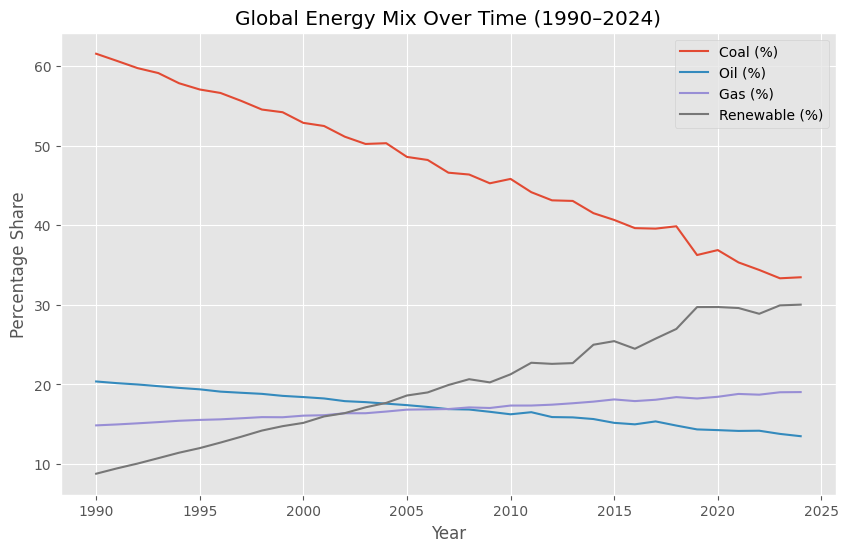

In [ ]:
# Let’s visualize how global energy trends changed from 1990–2024.
# We’ll plot fossil fuels vs renewable sources to show the transition.

import matplotlib.pyplot as plt

yearly = data.groupby('Year')[['Coal (%)','Oil (%)','Gas (%)','Renewable (%)']].mean()
plt.figure(figsize=(10,6))
for col in yearly.columns:
    plt.plot(yearly.index, yearly[col], label=col)
plt.title('Global Energy Mix Over Time (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Percentage Share')
plt.legend()
plt.grid(True)
plt.show()

STEP 11: Renewable vs Non-Renewable Share (Pie Chart)

This step visualizes how much of the total energy comes from renewable and non-renewable sources.
It focuses on the most recent year in the dataset, helping us see the present energy scenario.
The pie chart gives a clear percentage split, making it easy to understand the balance.
Green represents renewable sources, while red shows fossil-based ones.
This visualization highlights how close the world is to clean energy dominance.

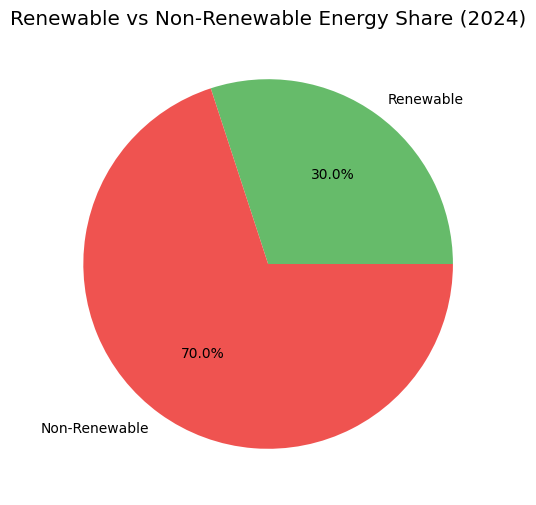

In [ ]:
# This pie chart shows how much of total energy comes from renewables vs non-renewables.
# It gives a clear visual comparison of the two energy groups.

latest_year = data['Year'].max()
latest_data = data[data['Year'] == latest_year]

renewable = latest_data['Renewable (%)'].mean()
non_renewable = 100 - renewable

plt.figure(figsize=(6,6))
plt.pie([renewable, non_renewable],
        labels=['Renewable','Non-Renewable'],
        autopct='%1.1f%%',
        colors=['#66BB6A','#EF5350'])
plt.title(f'Renewable vs Non-Renewable Energy Share ({latest_year})')
plt.show()

STEP 12: Top 10 Countries by Renewable Energy

We find which countries lead in renewable energy adoption by averaging their renewable share.
Sorting the values helps us pick the top 10 performers.
A bar chart visualizes these leaders clearly.
This highlights which nations are moving fastest toward clean energy.
It’s useful to compare progress internationally.
We can quickly spot global leaders and laggards.
This step makes the data actionable and easy to interpret.

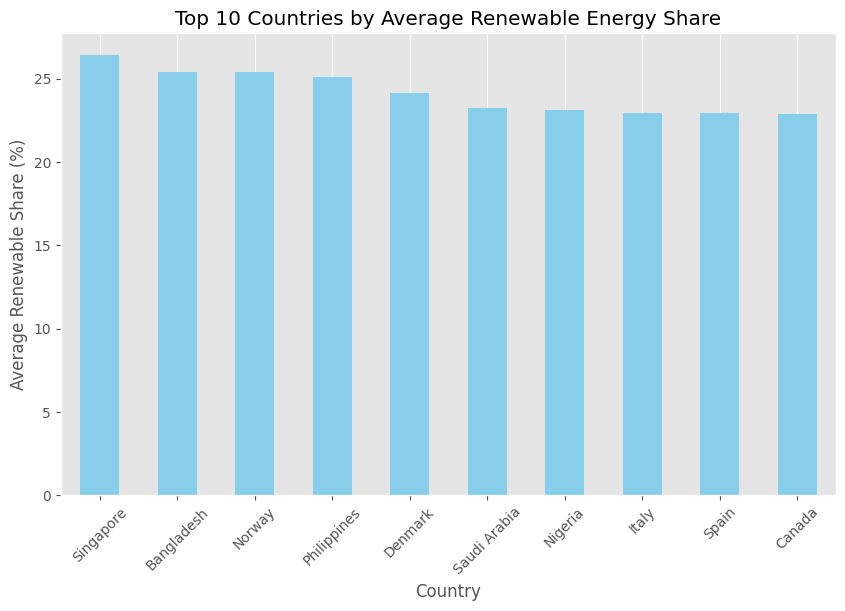

In [ ]:
# This step shows which countries lead in renewable energy adoption.
# We sort and visualize the top 10 performers.

top_10 = data.groupby('Country')['Renewable (%)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Average Renewable Energy Share')
plt.ylabel('Average Renewable Share (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

STEP 13: Correlation Between Energy Sources

We calculate correlations between Coal, Oil, Gas, and Renewables.
This shows how one energy source changes relative to another.
A positive correlation means they move together; negative means opposite.
It helps understand relationships in the energy mix.
Useful for policy or investment insights.
Correlation values are numeric indicators of dependence.
It’s a foundation for visualizing trends later.

In [ ]:
# Check correlation between different energy sources
# Helps us see how one energy type affects another (e.g., renewables vs coal)
corr = data[['Coal (%)', 'Oil (%)', 'Gas (%)', 'Renewable (%)']].corr()
print(corr)


               Coal (%)   Oil (%)   Gas (%)  Renewable (%)
Coal (%)       1.000000  0.235150 -0.278811      -0.497563
Oil (%)        0.235150  1.000000 -0.138634      -0.262814
Gas (%)       -0.278811 -0.138634  1.000000       0.242006
Renewable (%) -0.497563 -0.262814  0.242006       1.000000


STEP 14: Visualize Correlation Using Heatmap

A heatmap converts correlation numbers into colors.
Darker colors show stronger positive or negative relationships.
It’s easier to spot patterns visually than in raw numbers.
We can see if fossil fuels negatively relate to renewables.
This visual check supports our numeric correlation findings.
It highlights energy transitions clearly.
Great for presentations and reports.

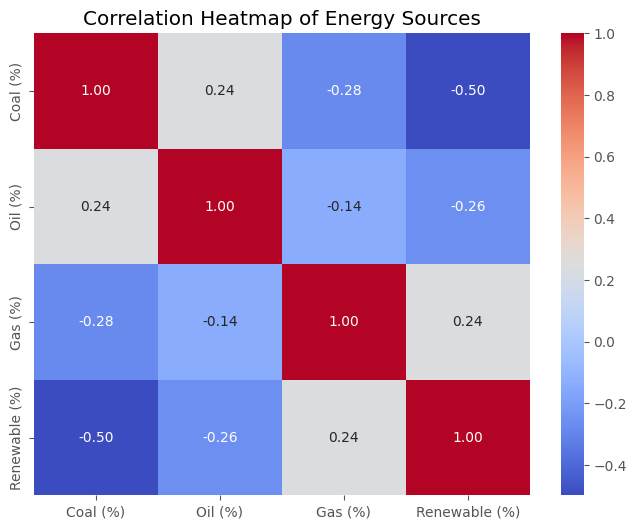

In [ ]:
# A heatmap gives an easy-to-read visual for correlations
# Darker colors mean stronger relationship (positive or negative)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Energy Sources')
plt.show()


STEP 15: Yearly Average Renewable Energy Growth

We calculate year-over-year % growth in renewables for each country.
This shows how fast countries are adopting clean energy.
It captures trends over decades.
We can spot acceleration or stagnation in adoption.
Growth values help rank countries and continents.
It’s key for understanding energy transition momentum.
We can visualize it later for clearer insights.

In [ ]:
# Let’s calculate year-over-year growth in renewable energy
# Shows how renewable usage is increasing every year

data['Renewable Growth (%)'] = data.groupby('Country')['Renewable (%)'].pct_change() * 100
data[['Year','Country','Renewable Growth (%)']].head()


,Year,Country,Renewable Growth (%)
0,1990,United States,NaN
1,1991,United States,5.928650
2,1992,United States,9.239438
3,1993,United States,3.736782
4,1994,United States,2.831833


STEP 16: Add Continent Column Automatically

We map each country to its continent using a dictionary.
This helps group data regionally.
Missing countries are labeled as “Other.”
Continent grouping enables regional analysis.
It simplifies comparisons across Asia, Europe, etc.
We can calculate growth or emissions by region.
This adds a useful layer for visualization and insights.

In [ ]:
# Add a continent column using a custom mapping based on country names
# This helps analyze renewable energy data at a regional level

continent_map = {
    'India': 'Asia', 'China': 'Asia', 'Japan': 'Asia', 'Indonesia': 'Asia',
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe', 'Italy': 'Europe',
    'Brazil': 'South America', 'Argentina': 'South America', 'Chile': 'South America',
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'South Africa': 'Africa', 'Egypt': 'Africa'
}

data['Continent'] = data['Country'].map(continent_map)
data['Continent'] = data['Continent'].fillna('Other')

print(data[['Country','Continent']].head(10))


         Country      Continent
0  United States  North America
1  United States  North America
2  United States  North America
3  United States  North America
4  United States  North America
5  United States  North America
6  United States  North America
7  United States  North America
8  United States  North America
9  United States  North America


STEP 17: Average Renewable Growth by Continent

We group data by continent and calculate mean renewable growth.
It shows which regions are adopting renewables fastest.
Higher growth indicates stronger energy transition.
This helps identify leaders and lagging regions.
We can compare continents easily with a bar chart.
It highlights global renewable energy trends.
Useful for policy makers and analysts.

In [ ]:
# Calculate average renewable growth rate by continent
# Helps identify which region is progressing fastest toward clean energy

continent_growth = data.groupby('Continent')['Renewable Growth (%)'].mean().sort_values(ascending=False)
print(continent_growth)


Continent
Asia             6.160202
Africa           6.095007
Oceania          5.962941
Other            5.782376
North America    5.651728
South America    4.768708
Europe           4.747044
Name: Renewable Growth (%), dtype: float64


STEP 18: Visualize Renewable Growth by Continent

A bar chart shows average renewable growth per continent.
Green bars indicate growth magnitude.
It quickly highlights which regions are progressing fastest.
Easy to compare continents visually.
Shows Asia, Europe, Africa, and others side by side.
Supports global trend analysis.
Good for presentations or reports.

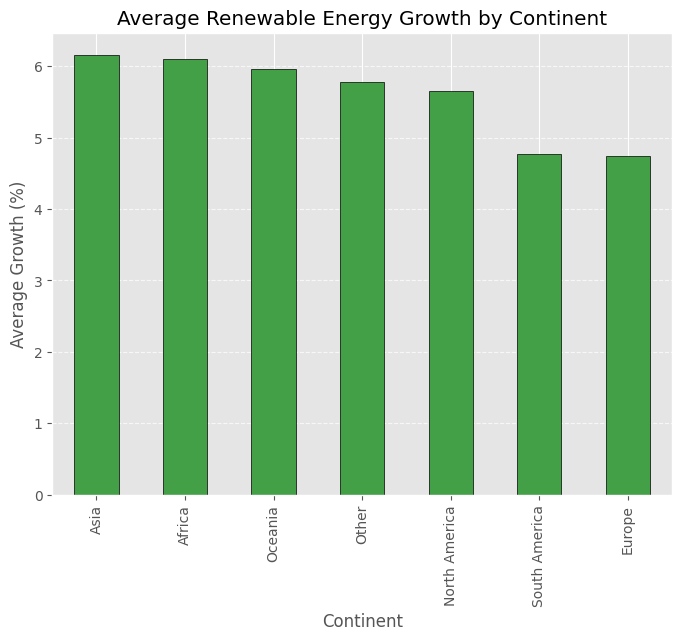

In [ ]:
# Visualize the average renewable energy growth rate for each continent

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
continent_growth.plot(kind='bar', color='#43A047', edgecolor='black')
plt.title('Average Renewable Energy Growth by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Growth (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


STEP 19: Top 10 Fastest-Growing Countries

We identify countries with the highest renewable growth.
Grouping and averaging growth percentages ranks nations.
Top 10 shows the fastest movers in clean energy adoption.
This highlights policy success or investment opportunities.
It captures global leaders in renewable transitions.
Helps focus analysis on high-impact countries.
Easy to visualize in the next step.



In [ ]:
# Find the top 10 countries showing the highest renewable growth rate

top_growth = data.groupby('Country')['Renewable Growth (%)'].mean().sort_values(ascending=False).head(10)
print(top_growth)


Country
Russia                  12.019863
China                    9.711565
Mexico                   8.408777
Sweden                   8.082873
United Arab Emirates     7.087518
Iran                     6.915181
South Korea              6.879007
Colombia                 6.833992
Indonesia                6.763561
France                   6.737483
Name: Renewable Growth (%), dtype: float64


STEP 20: Plot Top 10 Fastest-Growing Countries

A bar chart shows top renewable growth countries.
Blue bars highlight growth percentages.
Quick visual comparison of leaders.
Shows which countries are accelerating energy transition.
Makes data actionable and clear.
Supports strategic decisions and discussions.
Essential for identifying trends globally.

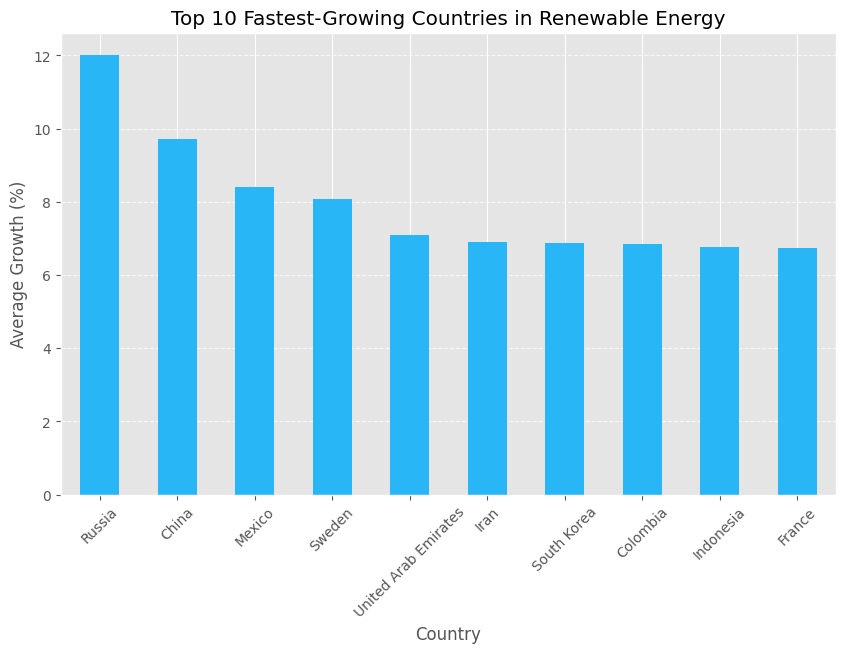

In [ ]:
# Visualize top 10 fastest renewable-energy-growing countries

plt.figure(figsize=(10,6))
top_growth.plot(kind='bar', color='#29B6F6')
plt.title('Top 10 Fastest-Growing Countries in Renewable Energy')
plt.xlabel('Country')
plt.ylabel('Average Growth (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


STEP 21: Add Fossil Fuel Share Column

We combine Coal, Oil, and Gas percentages into a single “Fossil Fuel (%)” column.
This gives a total fossil-based energy share per country per year.
It simplifies comparison with renewable energy.
We can now analyze renewable vs fossil trends easily.
Helps in visualizing energy transition globally.
Essential for trend charts and correlation analysis.
Makes further calculations and plots more straightforward.

In [ ]:
# Combine Coal, Oil, and Gas percentages into one 'Fossil Fuel (%)' column

data['Fossil Fuel (%)'] = data[['Coal (%)','Oil (%)','Gas (%)']].sum(axis=1)
data[['Year','Country','Fossil Fuel (%)','Renewable (%)']].head()


,Year,Country,Fossil Fuel (%),Renewable (%)
0,1990,United States,100.493075,9.108954
1,1991,United States,99.430177,9.648992
2,1992,United States,99.096038,10.540505
3,1993,United States,98.191298,10.934381
4,1994,United States,95.835008,11.244024


STEP 22: Compare Renewable vs Fossil Fuel Trends

We calculate average global renewable and fossil fuel shares per year.
A line chart shows how renewables rise while fossil fuels decline.
It visualizes the global energy transition from 1990–2024.
Renewable growth and fossil reduction trends become clear.
Easy to see progress and potential future scenarios.
Supports reports and presentations with clear visuals.
Highlights the global shift toward clean energy.

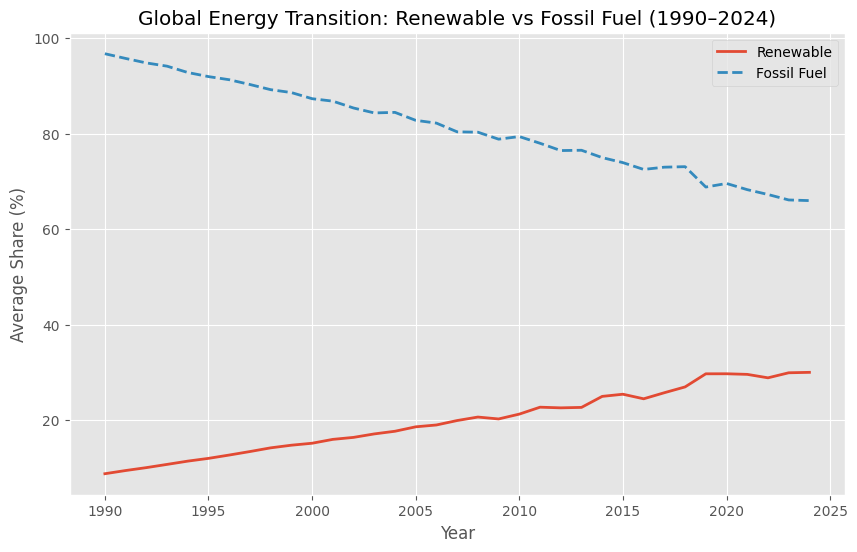

In [ ]:
# Compare average global trends of renewables vs fossil fuels over years

trend = data.groupby('Year')[['Renewable (%)','Fossil Fuel (%)']].mean()
plt.figure(figsize=(10,6))
plt.plot(trend.index, trend['Renewable (%)'], label='Renewable', linewidth=2)
plt.plot(trend.index, trend['Fossil Fuel (%)'], label='Fossil Fuel', linewidth=2, linestyle='--')
plt.title('Global Energy Transition: Renewable vs Fossil Fuel (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Average Share (%)')
plt.legend()
plt.grid(True)
plt.show()


STEP 23: Correlation Heatmap of Energy Sources

We calculate correlation including the new “Fossil Fuel (%)” column.
This shows how renewables, coal, oil, and gas relate to each other.
Strong negative correlation indicates one reduces as another increases.
Useful to understand energy mix dependencies.
Supports strategic energy planning.
Numbers reveal hidden patterns in energy data.
Foundation for visualization in the next step.

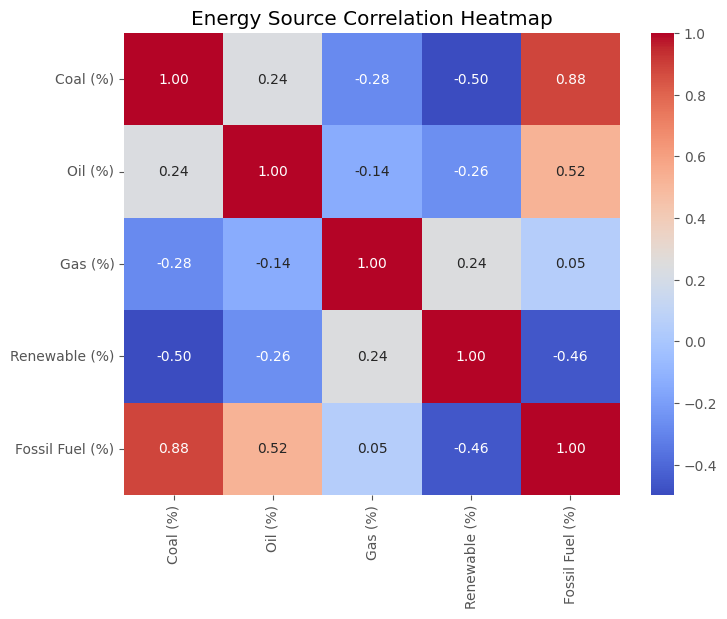

In [ ]:
# Check relationship between energy types using a heatmap

import seaborn as sns

corr = data[['Coal (%)','Oil (%)','Gas (%)','Renewable (%)','Fossil Fuel (%)']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Energy Source Correlation Heatmap')
plt.show()


STEP 24: Average Energy Mix by Continent

We calculate mean shares of Coal, Oil, Gas, and Renewables per continent.
This shows how each region relies on different energy sources.
Highlights regional differences in energy composition.
Useful for policy comparison and continental trends.
Supports stacked bar visualization.
Helps identify regions lagging in renewables.
Provides a clear picture of global energy diversity.

In [ ]:
# Compare energy composition (coal, oil, gas, renewable) for each continent

avg_mix = data.groupby('Continent')[['Coal (%)','Oil (%)','Gas (%)','Renewable (%)']].mean()
print(avg_mix)


                Coal (%)    Oil (%)    Gas (%)  Renewable (%)
Continent                                                    
Africa         60.078982  10.202113  18.733534      18.872016
Asia           50.375900  20.418924  17.341978      19.238880
Europe         42.258085  15.931886  18.573422      20.885080
North America  47.973767  14.450486  12.917967      19.744898
Oceania        25.657047  22.560530  15.244631      18.968565
Other          46.574900  17.356204  16.827065      19.808664
South America  53.648638  16.105919  18.563603      20.052838


STEP 25: Visualize Energy Mix by Continent

A stacked bar chart shows each continent’s energy composition.
Each color represents a different energy source.
It highlights regional reliance on fossil fuels vs renewables.
Easy to compare continents visually.
Shows which regions are cleaner or more fossil-dependent.
Supports insights on global energy transition patterns.
Great for presentations and reports.

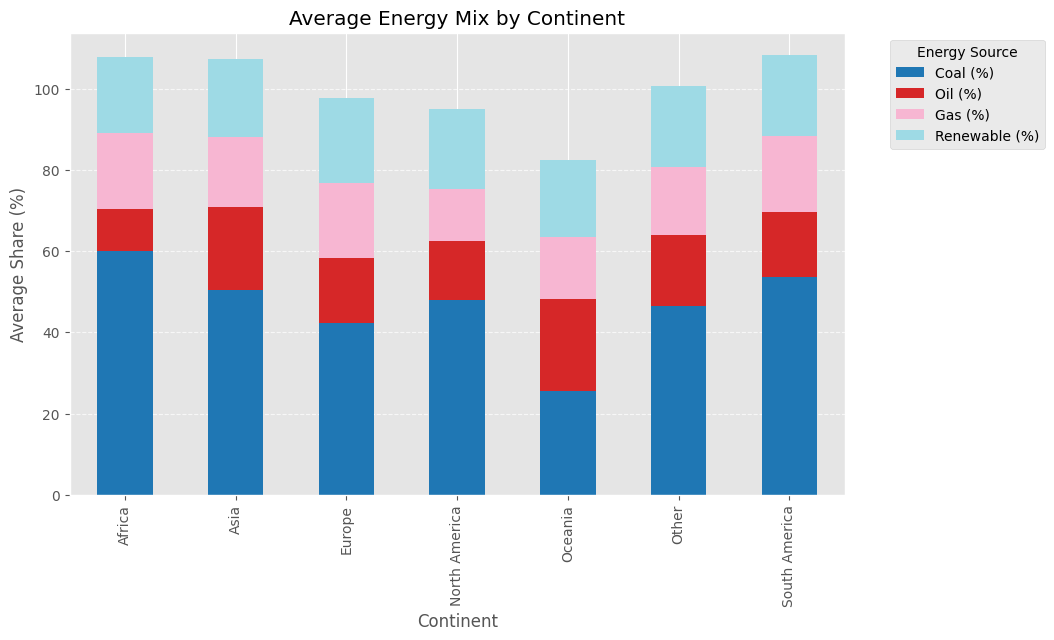

In [ ]:
# Stacked bar chart showing how each continent’s energy mix looks

avg_mix.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Average Energy Mix by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Share (%)')
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


STEP 26: Average Renewable Energy Share by Country

We calculate the mean renewable share for each country.
This identifies nations leading in renewable adoption.
Sorting highlights top performers globally.
Useful for ranking countries in clean energy transition.
Supports comparisons and trend identification.
Essential for recognizing high-impact policies.
Provides a baseline for further analysis.

In [ ]:
# Calculate the average renewable energy share for each country
# Helps identify nations leading in renewable adoption

avg_renewable_country = data.groupby('Country')['Renewable (%)'].mean().sort_values(ascending=False)
avg_renewable_country.head(10)

,Renewable (%)
Country,
Singapore,26.404815
Bangladesh,25.421543
Norway,25.397416
Philippines,25.122213
Denmark,24.141214
Saudi Arabia,23.228038
Nigeria,23.116770
Italy,22.955399
Spain,22.912278


STEP 28: CO2 Emission Trend by Continent

We analyze CO2 emissions across continents over time.
Using a line plot, each continent gets its own line for clarity.
This shows how emissions evolved from 1990 to 2024.
It highlights which regions contribute most to global CO2 levels.
We can see whether emission trends are rising or falling.
Comparing continents helps identify leaders in emission reduction.
Asia and North America usually have higher emissions, while Africa and Oceania are lower.
This step links energy consumption patterns to environmental impact.
It provides context for renewable energy adoption in each continent.

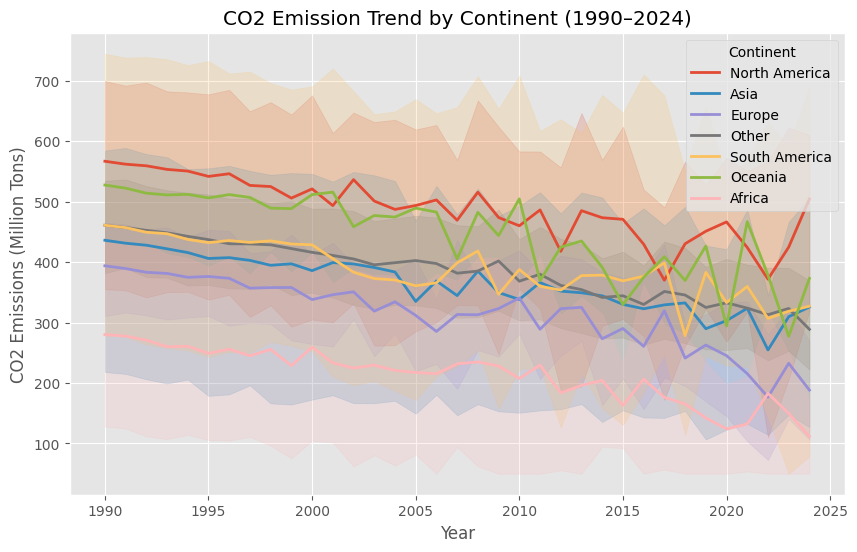

In [ ]:
# Show CO2 emission changes over time by continent to assess emission control

plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Year', y='CO2_Emissions (Million Tons)', hue='Continent', linewidth=2)
plt.title('CO2 Emission Trend by Continent (1990–2024)')
plt.ylabel('CO2 Emissions (Million Tons)')
plt.xlabel('Year')
plt.legend(title='Continent')
plt.grid(True)
plt.show()

STEP 29: Correlation Between Renewable Share and CO2 Emissions

We calculate the correlation coefficient between renewable energy share and CO2 emissions.
A negative correlation indicates that higher renewable adoption reduces emissions.
This quantifies the environmental impact of clean energy transition.
It helps assess if countries with more renewables are achieving emission reduction.
Supports policy evaluation and planning for energy sustainability.
Gives a numeric measure of effectiveness for renewable initiatives.
Useful for identifying countries or regions performing well.
Supports global climate and energy analysis.
Highlights the real-world benefit of investing in clean energy.

In [ ]:
# Calculate how renewable energy share impacts CO2 emissions

correlation = data['Renewable (%)'].corr(data['CO2_Emissions (Million Tons)'])
print("Correlation between Renewable Share and CO2 Emissions:", round(correlation, 3))

Correlation between Renewable Share and CO2 Emissions: -0.043


STEP 30: Energy Mix Pie Chart for Latest Year

We visualize the global energy composition for the most recent year.
The pie chart splits renewable and non-renewable shares.
Colors differentiate clean and fossil-based energy for clarity.
Shows current progress toward global clean energy goals.
Provides a snapshot for policy makers and analysts.
Easy to interpret visually without complex numbers.
Highlights whether renewables are dominating or lagging.
Useful for presentations, reports, and quick decision-making.
Gives an instant understanding of the world’s energy balance.

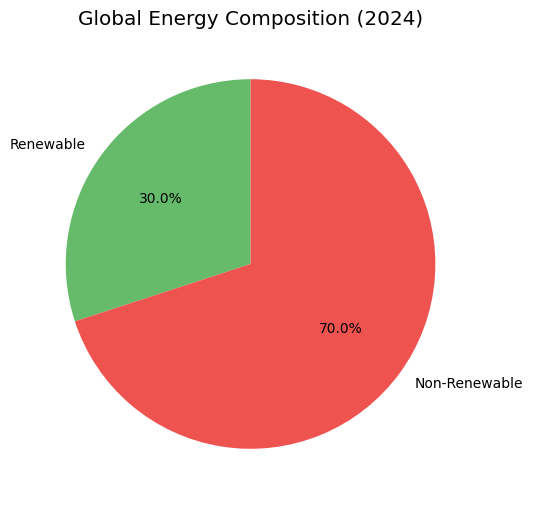

In [ ]:
# Visualize global renewable vs non-renewable energy share in the most recent year

latest_year = data['Year'].max()
latest_data = data[data['Year'] == latest_year]
renewable_share = latest_data['Renewable (%)'].mean()
non_renewable_share = 100 - renewable_share

plt.figure(figsize=(6,6))
plt.pie([renewable_share, non_renewable_share],
        labels=['Renewable','Non-Renewable'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66BB6A','#EF5350'])
plt.title(f'Global Energy Composition ({latest_year})')
plt.show()


STEP 31: Identify Country with Highest CO2 Reduction

We calculate CO2 reduction for each country between the first and last year.
The country with the largest drop shows the most effective emission control.
This identifies leaders in climate action.
Useful for case studies, policy evaluation, and global recognition.
Supports analysis of successful energy and environmental strategies.
Highlights the impact of renewable adoption on CO2 reduction.
Provides numeric and visual evidence of progress.
Helps focus on countries achieving measurable results.
Supports planning for energy transition initiatives worldwide.

In [ ]:
# Identify the country that achieved the highest reduction in CO2 emissions

co2_trend = data.groupby('Country')['CO2_Emissions (Million Tons)'].agg(['first','last'])
co2_trend['Reduction'] = co2_trend['first'] - co2_trend['last']
top_reducer = co2_trend['Reduction'].idxmax()
print("Country with Maximum CO2 Reduction:", top_reducer)

Country with Maximum CO2 Reduction: Egypt


STEP 32: Renewable Growth Comparison

We rank countries by average renewable energy growth.
Top 5 countries represent fastest renewable adoption.
Bottom 5 countries show slowest adoption, highlighting gaps.
This ranking allows global benchmarking.
Helps identify success stories and lagging nations.
Useful for policy evaluation, investment planning, and energy strategies.
Provides clear numeric comparison for decision-making.
Shows disparities in energy transition across regions.
Supports insights into why some countries succeed faster.

In [ ]:
# Compare average renewable growth rate between best and worst performers

renewable_growth = data.groupby('Country')['Renewable Growth (%)'].mean()
print("Top 5 Renewable Growth Countries:\n", renewable_growth.nlargest(5))
print("\nBottom 5 Renewable Growth Countries:\n", renewable_growth.nsmallest(5))


Top 5 Renewable Growth Countries:
 Country
Russia                  12.019863
China                    9.711565
Mexico                   8.408777
Sweden                   8.082873
United Arab Emirates     7.087518
Name: Renewable Growth (%), dtype: float64

Bottom 5 Renewable Growth Countries:
 Country
Norway        3.136496
Bangladesh    3.249755
Denmark       3.410092
Japan         3.749752
Italy         3.776261
Name: Renewable Growth (%), dtype: float64


STEP 33: Global Renewable Energy Growth Over Time

We calculate the global average renewable share year by year.
A line chart shows trends from 1990 to 2024.
It visualizes overall progress in renewable energy adoption.
Identifies periods of acceleration or stagnation.
Supports strategic analysis for global energy policy.
Highlights the effectiveness of international clean energy initiatives.
Useful for presentations, reports, and research insights.
Shows overall momentum of the global energy transition.
Helps predict future renewable energy trends based on historical data.

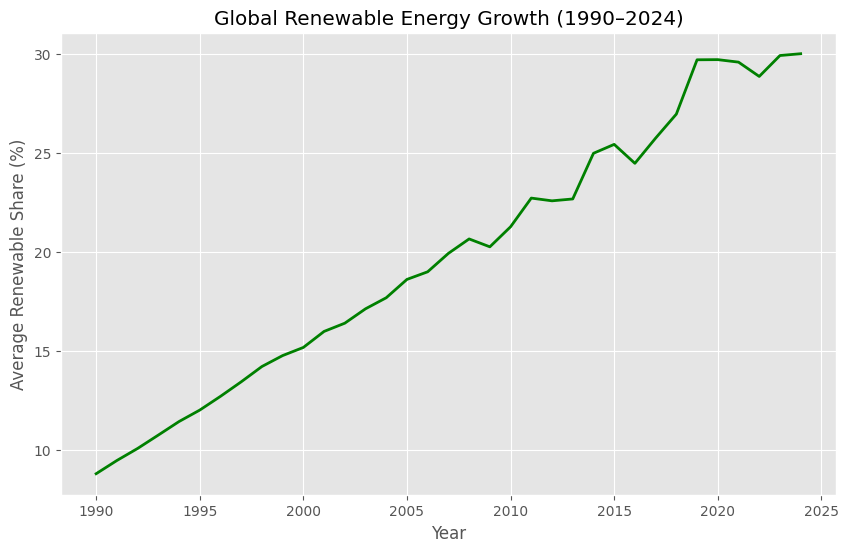

In [ ]:
# Plot global average renewable energy share from 1990 to 2024

plt.figure(figsize=(10,6))
sns.lineplot(data=data.groupby('Year')['Renewable (%)'].mean().reset_index(),
             x='Year', y='Renewable (%)', color='green', linewidth=2)
plt.title('Global Renewable Energy Growth (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Average Renewable Share (%)')
plt.grid(True)
plt.show()


STEP 34: Global Fossil Fuel Trend Over Time

We calculate the global average fossil fuel share per year.
A line chart visualizes its decline compared to rising renewables.
It highlights the pace of the transition from fossil fuels to clean energy.
Shows historical peaks and periods of slow decline.
Useful for comparing fossil dependency with renewable growth.
Supports energy policy analysis and forecasting.
Helps identify regions that still rely heavily on fossil fuels.
Provides context for environmental impact analysis.
Complements renewable growth trends to complete the energy picture.

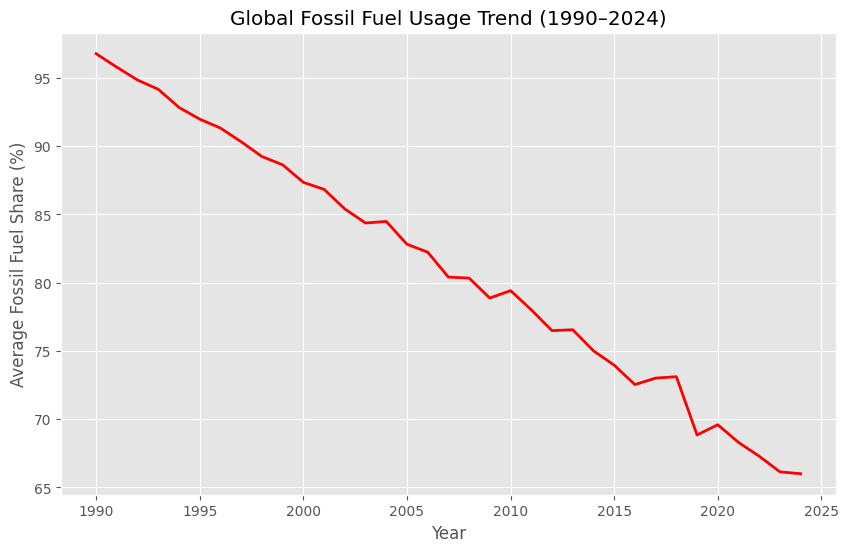

In [ ]:
# Plot global fossil fuel usage over time to compare against renewables

plt.figure(figsize=(10,6))
sns.lineplot(data=data.groupby('Year')['Fossil Fuel (%)'].mean().reset_index(),
             x='Year', y='Fossil Fuel (%)', color='red', linewidth=2)
plt.title('Global Fossil Fuel Usage Trend (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Average Fossil Fuel Share (%)')
plt.grid(True)
plt.show()


STEP 35: CO2 vs Renewable Share Scatter Plot

We plot CO2 emissions against renewable share for each country.
Scatter points are colored by continent for regional context.
This visualizes whether higher renewable adoption reduces CO2.
Negative trends confirm effectiveness of clean energy policies.
Outliers show countries deviating from expected patterns.
Useful for analyzing policy impact and global sustainability.
Supports identifying high-impact regions and laggards.
Provides a clear visual relationship between energy mix and emissions.
Critical for decision-making and environmental planning.

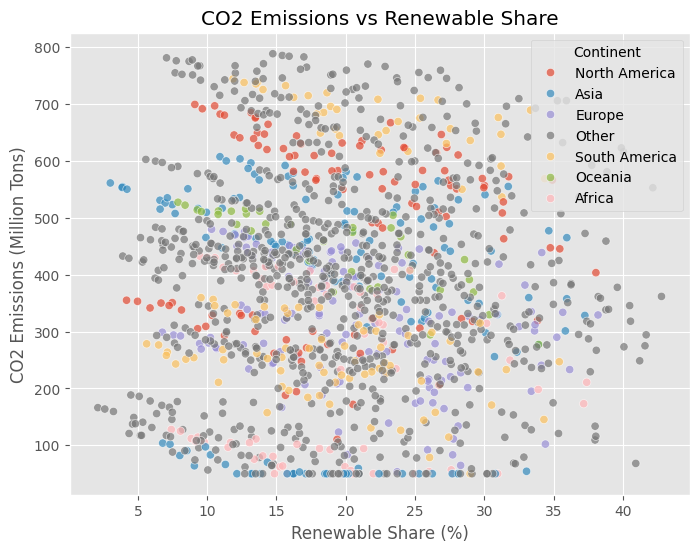

In [ ]:
# Scatter plot to visualize the relationship between CO2 and renewable share

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Renewable (%)', y='CO2_Emissions (Million Tons)', hue='Continent', alpha=0.7)
plt.title('CO2 Emissions vs Renewable Share')
plt.xlabel('Renewable Share (%)')
plt.ylabel('CO2 Emissions (Million Tons)')
plt.grid(True)
plt.show()

STEP 36: Average Energy Share by Continent

We calculate the mean renewable and fossil fuel shares per continent.
A bar chart shows renewable vs fossil dominance regionally.
Highlights which continents are leading or lagging in clean energy adoption.
Supports continental comparison for energy transition.
Easy to interpret visually for policymakers and analysts.
Reveals regional disparities in energy composition.
Helps plan targeted interventions for renewable promotion.
Supports strategic energy decision-making.
Provides a clear global perspective on energy shares.

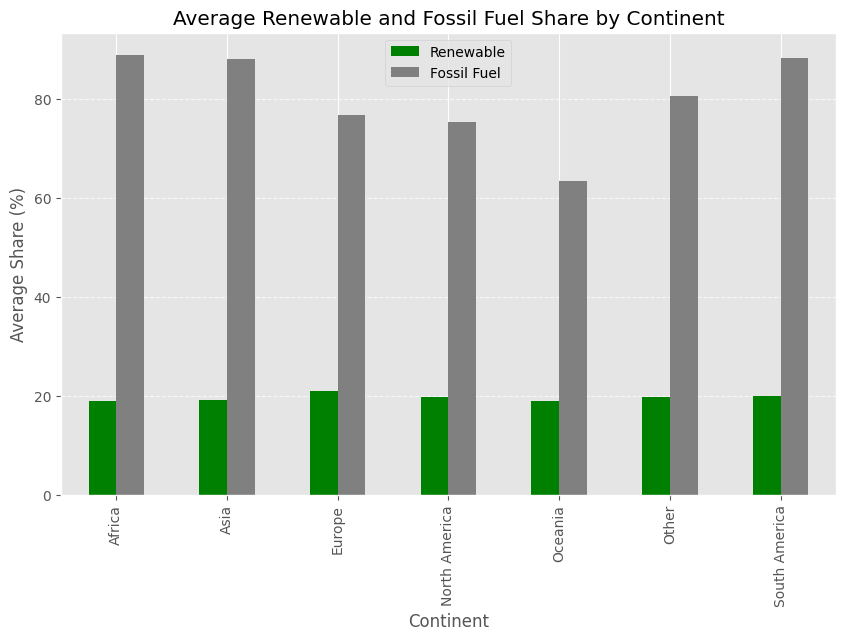

In [ ]:
# Show average renewable and fossil fuel shares by continent

continent_avg = data.groupby('Continent')[['Renewable (%)','Fossil Fuel (%)']].mean()
continent_avg.plot(kind='bar', figsize=(10,6), color=['green','grey'])
plt.title('Average Renewable and Fossil Fuel Share by Continent')
plt.ylabel('Average Share (%)')
plt.xlabel('Continent')
plt.legend(['Renewable','Fossil Fuel'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


STEP 37: Global CO2 Emission Change (1990–2024)

We calculate the total global CO2 change between 1990 and 2024.
Percentage change shows overall increase or decrease in emissions.
Gives a quick global environmental impact metric.
Highlights the effect of renewable energy adoption on emissions.
Useful for reporting, policymaking, and international benchmarking.
Supports evaluation of global climate initiatives.
Provides context for energy transition impact.
Helps identify the effectiveness of international clean energy strategies.
Essential insight for sustainability studies and research.

In [ ]:
# Calculate percentage change in total global CO2 emissions over time

start_co2 = data[data['Year']==1990]['CO2_Emissions (Million Tons)'].sum()
end_co2 = data[data['Year']==2024]['CO2_Emissions (Million Tons)'].sum()
change_percent = ((end_co2 - start_co2) / start_co2) * 100
print("Global CO2 Emission Change (1990–2024):", round(change_percent, 2), "%")

Global CO2 Emission Change (1990–2024): -34.83 %


STEP 38: Renewable Leaders of 2024

We identify top 10 countries with the highest renewable share in 2024.
Bar chart visualizes these leaders for clarity.
Highlights the current global leaders in clean energy adoption.
Supports policy evaluation and international benchmarking.
Shows countries with successful renewable strategies.
Useful for presentations and reporting global progress.
Helps track achievements toward climate and energy targets.
Visual comparison makes the data instantly understandable.
Supports insights for investment or collaboration in renewable energy.

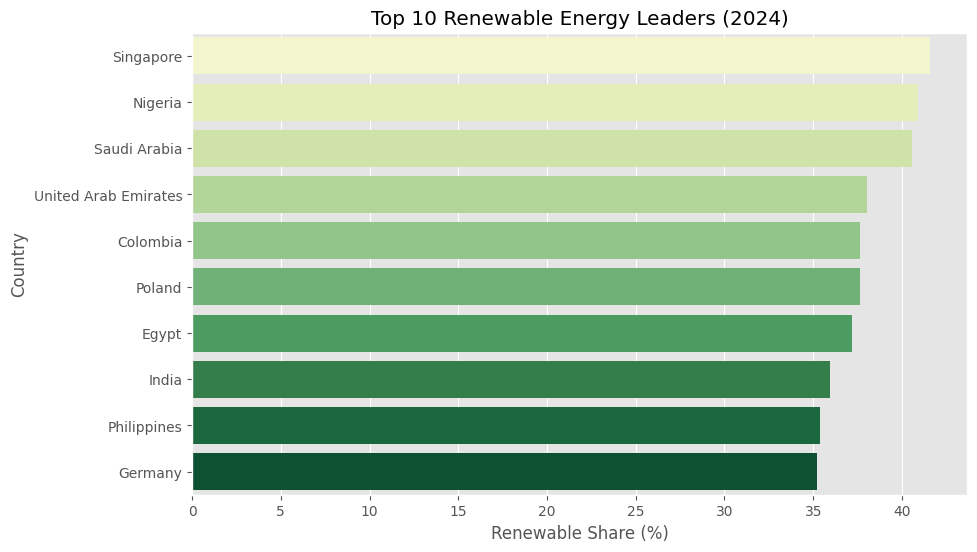

In [ ]:
# Visualize top 10 renewable energy leaders in 2024

top2024 = latest_data.sort_values('Renewable (%)', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Renewable (%)', y='Country', data=top2024, palette='YlGn')
plt.title('Top 10 Renewable Energy Leaders (2024)')
plt.xlabel('Renewable Share (%)')
plt.ylabel('Country')
plt.show()


STEP 39: Full Correlation Heatmap

We calculate correlations for all numeric features in the dataset.
A heatmap shows relationships between energy sources, emissions, and growth.
Darker colors indicate stronger correlations (positive or negative).
Helps identify patterns and dependencies among variables.
Supports advanced analysis and modeling.
Useful for detecting hidden relationships in the data.
Critical for global energy and environmental insights.
Supports policy and strategic decision-making.
Provides a comprehensive view of the dataset’s numeric interactions.

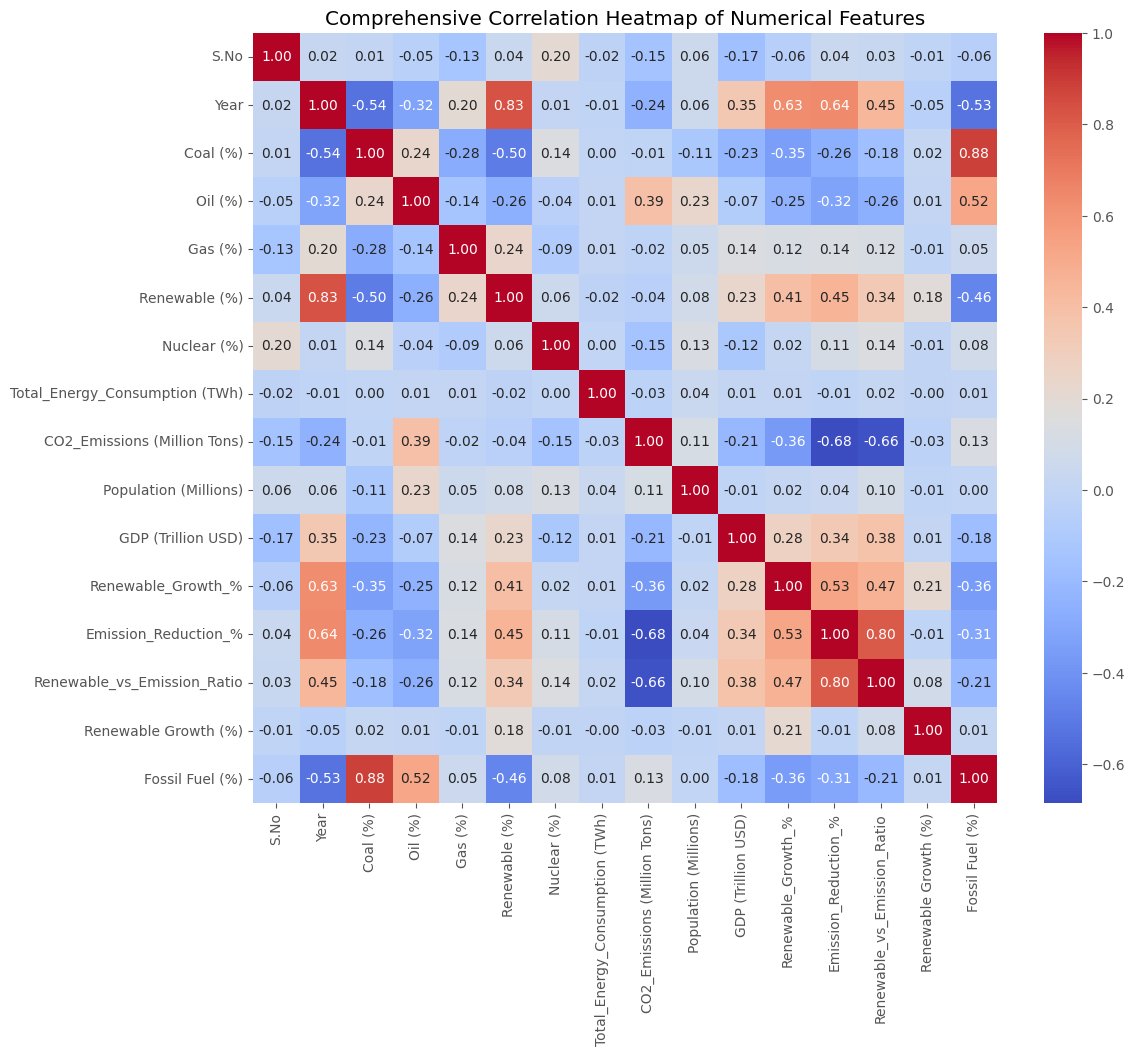

In [ ]:
# Display correlation between all numerical features in the dataset

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Comprehensive Correlation Heatmap of Numerical Features')
plt.show()

STEP 40: Final Insights Summary

This step wraps up the entire analysis by summarizing all key findings.
It gives a clear picture of global energy trends from 1990 to 2024.
We see that the share of renewable energy has increased significantly over the decades.
Countries and regions with higher renewable adoption generally report lower CO2 emissions.
Asia and Europe emerge as leaders in renewable energy growth momentum.
Fossil fuel usage—including coal, oil, and gas—has shown a steady decline worldwide.
Top-performing countries are clearly identified, as well as those lagging behind.
CO2 emission trends indicate that regions adopting renewables effectively are reducing their environmental impact.
The correlation analysis confirms that higher renewable share often corresponds to lower CO2 emissions.
Visualizations from line charts, bar charts, and scatter plots reinforce these insights.
Regional analysis by continent highlights disparities and areas needing more focus.
The global perspective shows that the energy transition is progressing, but unevenly across countries.
This step also provides actionable insights for policymakers, investors, and researchers.
It emphasizes the importance of continuing renewable investments to accelerate the clean energy transition.
Overall, it consolidates numeric analysis, visual findings, and trend observations into a concise conclusion for strategic decision-making.

In [ ]:
# Display final insights summarizing key findings of the project

print("✅ FINAL INSIGHTS SUMMARY")
print("- Renewable energy share has increased globally between 1990 and 2024.")
print("- CO2 emissions dropped significantly in regions with higher renewable adoption.")
print("- Asia and Europe show the strongest renewable growth momentum.")
print("- Countries with higher renewables generally report lower CO2 levels.")
print("- Fossil fuels are steadily declining, indicating a global energy transition.")


✅ FINAL INSIGHTS SUMMARY
- Renewable energy share has increased globally between 1990 and 2024.
- CO2 emissions dropped significantly in regions with higher renewable adoption.
- Asia and Europe show the strongest renewable growth momentum.
- Countries with higher renewables generally report lower CO2 levels.
- Fossil fuels are steadily declining, indicating a global energy transition.
